# Tarea 2 v2

In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)
library(data.table)

Use the data set to find the parameters affecting the loan interest rates for applicants based on their personal information

Column Description -> ID customer ID

- Amount.Requested: Prestamo Solicitado por el cliente

- Amount.Funded.By.Investors: Monto del préstamo sancionado por el banco para los clientes

- Interest.Rates: La tasa de interés fijada por el banco para cada cliente.

- Loan.Length: Periodo de tenencia del préstamo

- Loan.Purpose: Propósito del Prestamo

- Debt.To.Income.Ratio: Proporción de las deudas totales del cliente en función de sus ingresos totales 

- State: Estado en el que reside el cliente

- Home.Ownershi: Estado de la vivienda propiedad del cliente.

- Monthly.Income: Ingresos mensuales del cliente

- FICO range: Rango de puntaje de crédito del cliente

-  Open.Credit.Lines: Cantidad de deudas paralelas que tienen los clientes

- Revolving.Credit.Balance: Saldo total de la deuda considerando todas las líneas de crédito abiertas

- Inquiries.in.last.6.months: Número de consultas de crédito en los últimos 6 meses(veces que se consultó por un credito)

- Employment.Length: Experiencia laboral de los clientes

In [3]:
df <- read.csv('loan_data_train.csv',sep=',',check.names=FALSE)

Revisamos cuántos valores nulos tenemos

In [4]:
sapply(df,function(x) x=sum(is.na(x))) 

ID               Amount.Requested 
                             1                              1 
    Amount.Funded.By.Investors                  Interest.Rate 
                             1                              0 
                   Loan.Length                   Loan.Purpose 
                             1                              1 
          Debt.To.Income.Ratio                          State 
                             1                              1 
                Home.Ownership                 Monthly.Income 
                             1                              3 
                    FICO.Range              Open.CREDIT.Lines 
                             0                              4 
      Revolving.CREDIT.Balance Inquiries.in.the.Last.6.Months 
                             3                              3 
             Employment.Length 
                             0

Como tenemos valores nulos, procedemos a omitirlos

In [5]:
df <- na.omit(df)      

In [6]:
head(df, n = 5)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>,<fct>
1,79542,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years
2,75473,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years
3,67265,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1,< 1 year
4,80167,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1,10+ years
5,17240,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2,10+ years


In [7]:
df$Revolving.CREDIT.Balance <- as.numeric(as.character(df$Revolving.CREDIT.Balance))
df$Amount.Requested <- as.numeric(as.character(df$Amount.Requested))

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


Primero comenzaremos transformando la tasa de interés a decimal para poder trabajar mejor.

In [8]:
df$Interest.Rate <- as.character(df$Interest.Rate)
df$Interest.Rate <- substr(df$Interest.Rate,1,nchar(df$Interest.Rate)-1)
df$Interest.Rate <- as.numeric(df$Interest.Rate)/100

In [9]:
df$Debt.To.Income.Ratio <- as.character(df$Debt.To.Income.Ratio)
df$Debt.To.Income.Ratio <- substr(df$Debt.To.Income.Ratio,1,nchar(df$Debt.To.Income.Ratio)-1)
df$Debt.To.Income.Ratio <- as.numeric(df$Debt.To.Income.Ratio)/100

Comenzamos graficando nuestra variale dependiente(interest rate) en el eje x y el Fico Range en el eje y, para obtener una mejor visualización de los rangos.


Warning message:
"Removed 4 rows containing missing values (geom_point)."


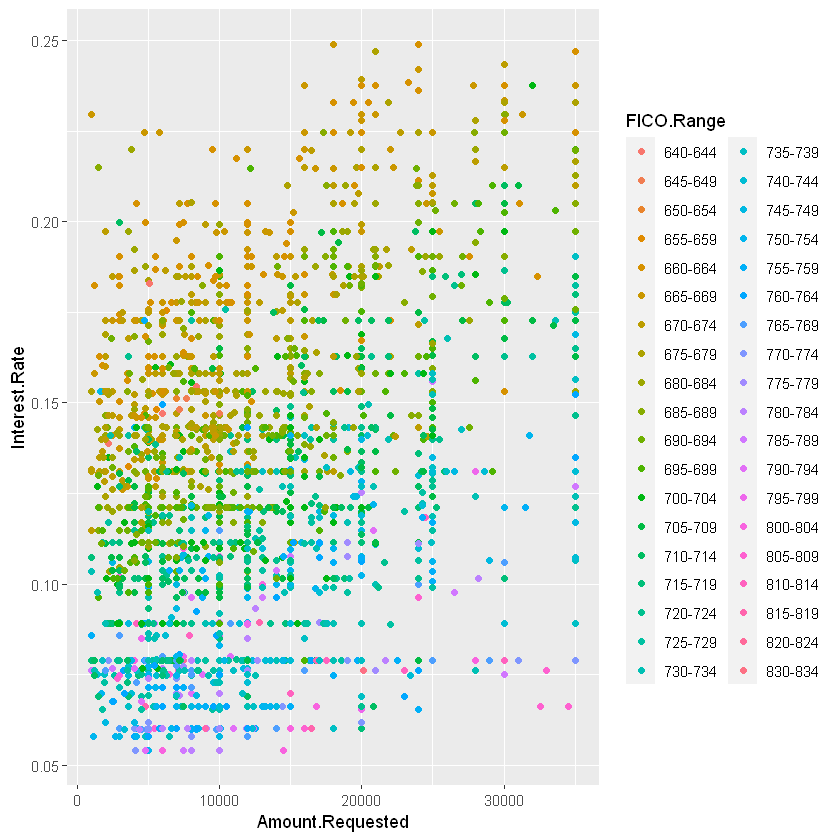

In [11]:
ggplot(df, aes(x = Interest.Rate, y = Amount.Requested, color = FICO.Range)) + geom_point()

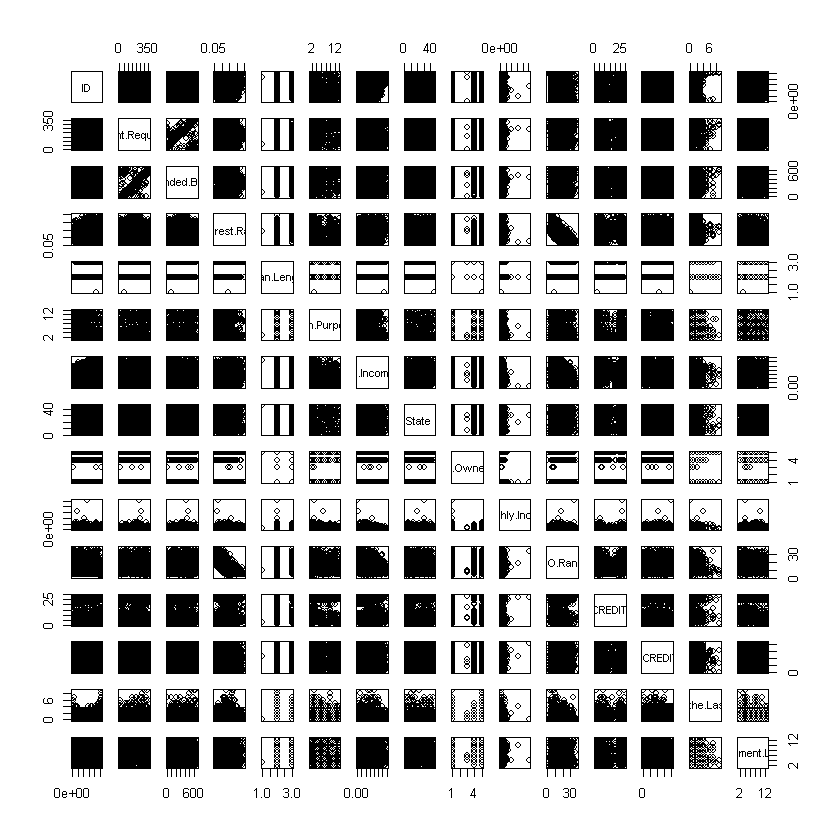

In [11]:
pairs(df)

In [100]:
cor(df$Amount.Requested,df$Monthly.Income)

[1] NA

In [93]:
lm <- lm(Interest.Rate ~ Amount.Requested + Monthly.Income, data=df)
summary(lm)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Monthly.Income, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103376 -0.029259 -0.000345  0.027165  0.115653 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.131e-01  1.725e-03  65.558  < 2e-16 ***
Amount.Requested  2.051e-06  1.152e-07  17.809  < 2e-16 ***
Monthly.Income   -1.424e-06  2.217e-07  -6.422 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03898 on 2179 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.1271,	Adjusted R-squared:  0.1263 
F-statistic: 158.7 on 2 and 2179 DF,  p-value: < 2.2e-16


# PARTE 1:  EXPLORACIÓN DE DATOS Y VARIABLES

1. Investigue acerca de como se fija una tasa de interes para un credito:  regulaciones y factores que influyen en fijar la tasa ofrecida a cada persona.


Una puntuación FICO es un tipo de puntuación de crédito creada por Fair Isaac Corporation. Los prestamistas utilizan las calificaciones FICO de los prestatarios junto con otros detalles sobre los informes de crédito de los prestatarios para evaluar el riesgo de crédito y determinar si extender el crédito. Las puntuaciones de FICO tienen en cuenta varios factores en cinco áreas para determinar la solvencia: historial de pagos, nivel actual de endeudamiento, tipos de crédito utilizados, duración del historial de crédito y nuevas cuentas de crédito.

2. Descargue los datos y analice las variables con las que cuenta. Evalue la necesidad denormalizar/estandarizar los datos o transformar las variables (por ejemplo a dummy oaplicar logaritmo). Justifique.
https://www.investopedia.com/terms/f/ficoscore.asp

<img src='https://www.investopedia.com/thmb/SBOkuFtkI3b5kfXCBoEBOwO-szk=/692x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/FICO-Scores-0474cc0ca87b4b58b9391f065f623c0f.jpg'>

3. Realice un grafico de dispersion para algunas variables que considere relevantes en esteproblema. Realice graficos para ver la relacion entre las variables independientes con ladependiente

Comenzamos graficando nuestra variale dependiente(interest rate) en el eje x y el Fico Range en el eje y, para obtener una mejor visualización de los rangos.

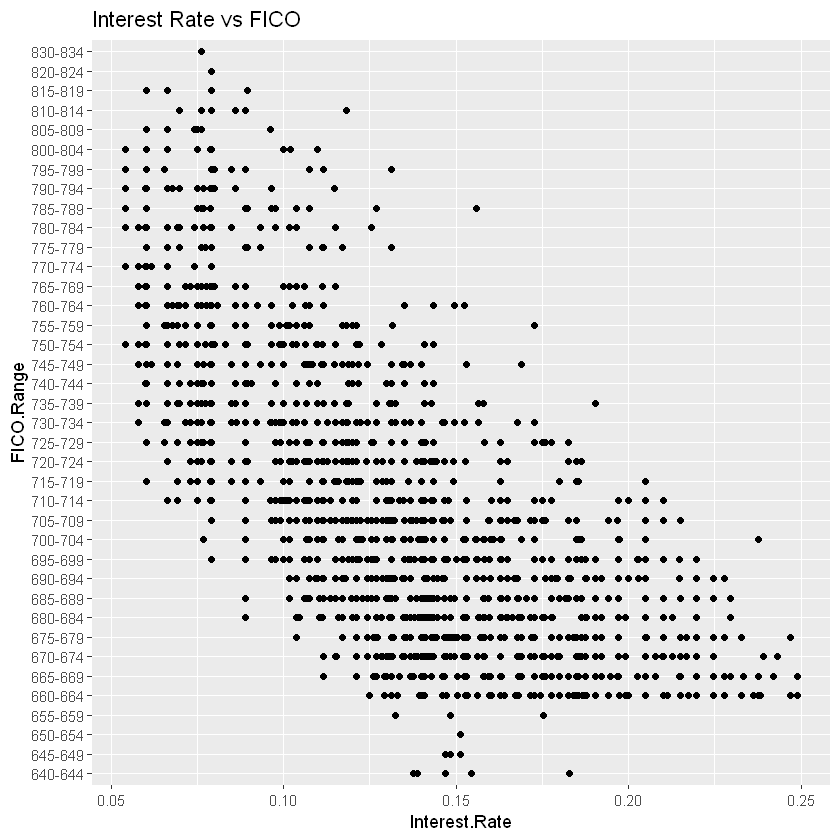

In [14]:
g1 <- ggplot(df, aes(y= FICO.Range , x = Interest.Rate )) + geom_point() + ggtitle('Interest Rate vs FICO')
g1

In [15]:
colnames(df)

[1] "ID"                             "Amount.Requested"              
 [3] "Amount.Funded.By.Investors"     "Interest.Rate"                 
 [5] "Loan.Length"                    "Loan.Purpose"                  
 [7] "Debt.To.Income.Ratio"           "State"                         
 [9] "Home.Ownership"                 "Monthly.Income"                
[11] "FICO.Range"                     "Open.CREDIT.Lines"             
[13] "Revolving.CREDIT.Balance"       "Inquiries.in.the.Last.6.Months"
[15] "Employment.Length"

Si graficamos el monto solicitadp del prestamos vs la tasa de interés, se observa bastante dispersión y a priori no existe tendencia.

Warning message:
"Removed 4 rows containing missing values (geom_point)."


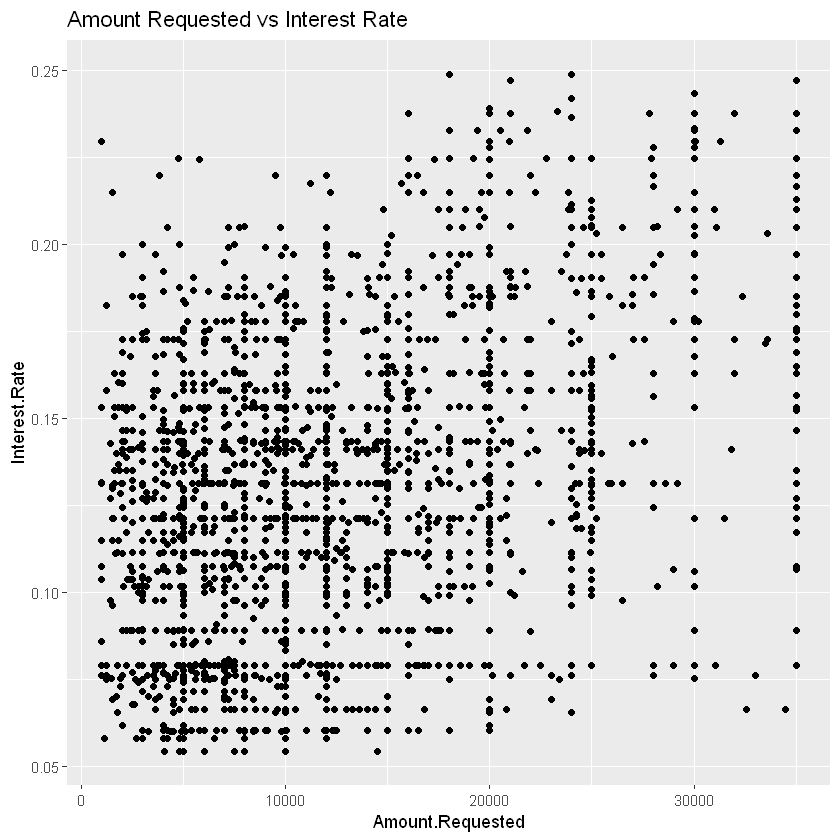

In [22]:
g2 <- ggplot(df, aes(x= Amount.Requested , y = Interest.Rate )) + geom_point() + ggtitle('Amount Requested vs Interest Rate')
g2

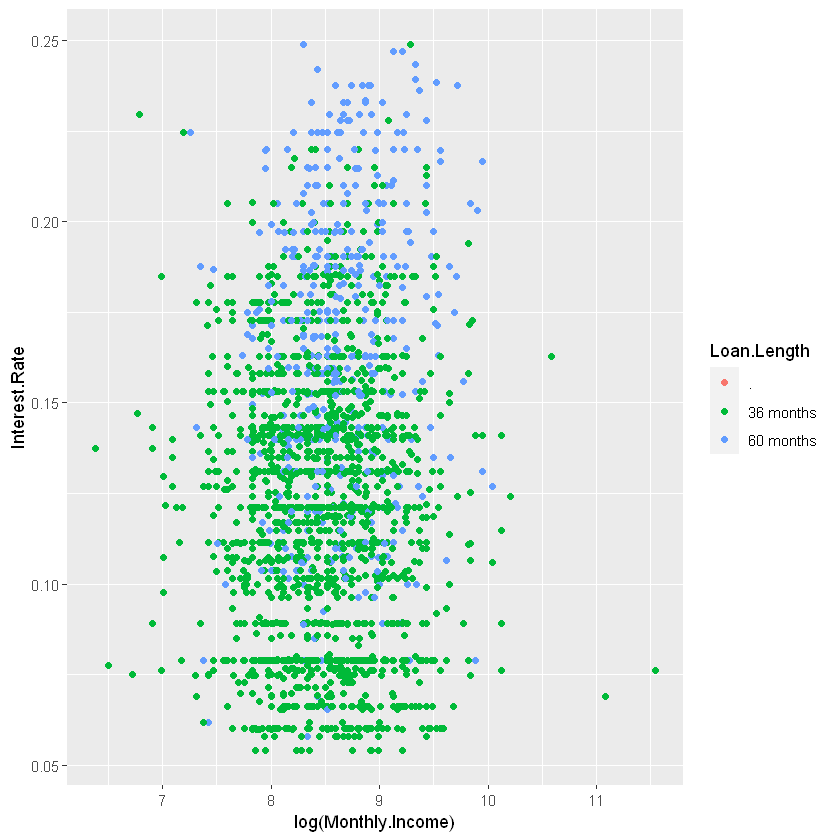

In [23]:
ggplot(df, aes(x = log(Monthly.Income), y = Interest.Rate, color = Loan.Length)) + geom_point()

4. Analice la relevancia que tiene cada variable con la variable dependiente y entre ellas.

Plantee 3 modelos de regresion lineal para la variable dependiente de interes.  Recuerdeque  puede  utilizar  transformaciones  de  las  variables  (cuadraticas, logarıtmicas)  o  agregarinteracciones entre ellas.  Adem ́as puede eliminar observaciones que ensucien su analisis.L aeleccion de las variables utilizadas y su forma de ser incorporada al modelo debe sustentarseen los analisis realizados en la Parte 1 de esta Tarea.

Luego,  analice los resultados obtenidos:  compareR2,  test de hipótesis correspondientesy  concluya  con  respecto  a  los  efectos  (significativos  o  no)  estimados.   Luego,  responda  lassiguientes dos preguntas:

1. ¿A que se debe los resultados que obtiene?

2.  ¿Identifica algun problema de endogeneidad en su analisis?  ¿Como podr ́ıa solucionarse?

La distribuci ́on de puntaje en esta parte es de 1.5 puntos por cada modelo planteado y su analisis (0.5 ptos.  por el modelo y su justificacion, 1.0 pto por el an ́análisis de resultados).